# Importing Libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Exploring Data Set

In [172]:
df=pd.read_csv('Housing.csv')

In [173]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [174]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [175]:
df.shape

(545, 13)

Handling Missing values & data types

In [176]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [177]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0}).astype('int64')
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 0,'unfurnished':0}).astype('int64')
df['log_price'] = np.log(df['price'])
df.describe()

C:\Users\kkaly\AppData\Local\Temp\ipykernel_14880\3549290638.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0}).astype('int64')
C:\Users\kkaly\AppData\Local\Temp\ipykernel_14880\3549290638.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'yes': 1, 'no': 0}).astype('int64')
C:\Users\kkaly\AppData\Local\Temp\ipykernel_14880\3549290638.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,15.306987
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.372165
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.375126
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.048071
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.283385
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,15.562970
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,16.403275


Checking Correlation

In [178]:
# Correlation with price
corr_with_price = df.corr()['log_price'].sort_values(ascending=False)
print(corr_with_price)


log_price           1.000000
price               0.969010
area                0.543233
bathrooms           0.485715
airconditioning     0.455159
stories             0.415281
parking             0.371638
bedrooms            0.369986
prefarea            0.340557
mainroad            0.330041
guestroom           0.277047
furnishingstatus    0.226975
basement            0.218401
hotwaterheating     0.088968
Name: log_price, dtype: float64


In [179]:

threshold = 0.30

selected_features = corr_with_price[abs(corr_with_price) >= threshold].drop(['price','log_price'])
print(selected_features)
feature_list = list(selected_features.index)

area               0.543233
bathrooms          0.485715
airconditioning    0.455159
stories            0.415281
parking            0.371638
bedrooms           0.369986
prefarea           0.340557
mainroad           0.330041
Name: log_price, dtype: float64


Randomly Spliting Data Set into Training and Testing sets

In [180]:
from sklearn.model_selection import train_test_split


In [181]:
X = df[feature_list]
y = df['log_price']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,     # 20% of data for testing, adjustable as needed
    random_state=1    # for reproducibility
)

In [183]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [184]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R² score:", score)

R² score: 0.6397536040639674


In [187]:
from sklearn.metrics import mean_squared_error

# y_test: actual values from test set
# y_pred: predicted values from your model

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Mean Squared Error (MSE): 0.055200450131037214
RMSE: 0.23494776042992455


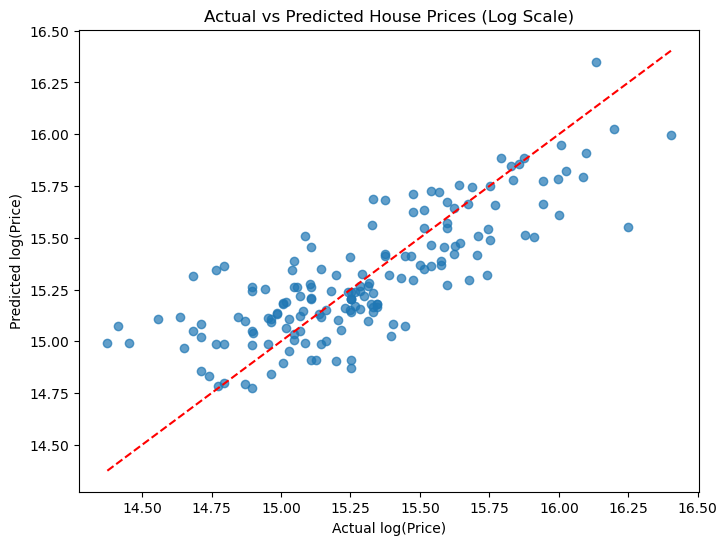

In [188]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual log(Price)')
plt.ylabel('Predicted log(Price)')
plt.title('Actual vs Predicted House Prices (Log Scale)')
plt.show()

Checking Residuals

In [ ]:
residuals = y_test - y_pred
print(residuals)

62     0.111202
247   -0.356167
142   -0.187842
107    0.169209
483   -0.347196
         ...   
450   -0.132648
542   -0.615178
408    0.040291
80     0.291093
46     0.056933
Name: log_price, Length: 164, dtype: float64


In [189]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})
print(results_df.head())


        Actual  Predicted  Residual
62   15.771371  15.660169  0.111202
247  15.330638  15.686805 -0.356167
142  15.538277  15.726119 -0.187842
107  15.627889  15.458680  0.169209
483  14.893920  15.241116 -0.347196


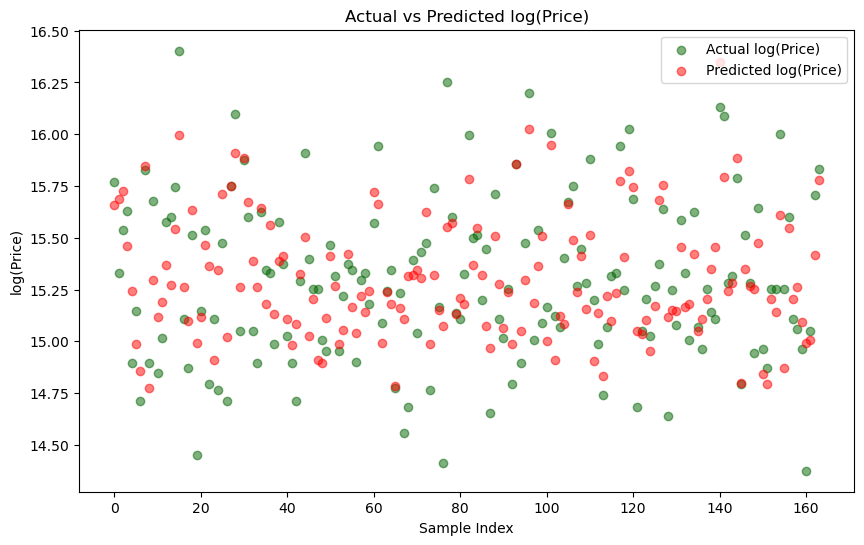

In [169]:
plt.figure(figsize=(10, 6))

# Plot actual values as dark green
plt.scatter(range(len(y_test)), y_test, color='darkgreen', alpha=0.5, label='Actual log(Price)')

# Plot predicted values as yellow
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted log(Price)')

plt.xlabel('Sample Index')
plt.ylabel('log(Price)')
plt.title('Actual vs Predicted log(Price)')
plt.legend()
plt.show()